In [1]:
import pandas as pd
from pyextremes import EVA
import pyextremes

In [2]:
pyextremes.__version__

'2.2.4'

In [3]:
series = pd.read_csv(
    "battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)

/jobfs/56359501.gadi-pbs/ipykernel_2013327/1790728726.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv(


In [4]:
series = (
    series
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
    .loc[pd.to_datetime("1925"):]
)
series = series - (series.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

In [5]:
print(series.head())

Date-Time (GMT)
1926-11-20 05:00:00   -0.411120
1926-11-20 06:00:00   -0.777120
1926-11-20 07:00:00   -1.051120
1926-11-20 08:00:00   -1.051121
1926-11-20 09:00:00   -0.808121
Name: Water Elevation [m NAVD88], dtype: float64


In [6]:
model = EVA(series)

In [7]:
model.get_extremes(method="BM", block_size="365.2425D")

In [8]:
print(model.extremes.head())

Date-Time (GMT)
1927-02-20 16:00:00    1.670154
1927-12-05 10:00:00    1.432893
1929-04-16 19:00:00    1.409977
1930-08-23 01:00:00    1.202101
1931-03-08 17:00:00    1.529547
Name: Water Elevation [m NAVD88], dtype: float64


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date-Time (GMT)', ylabel='Water Elevation [m NAVD88]'>)

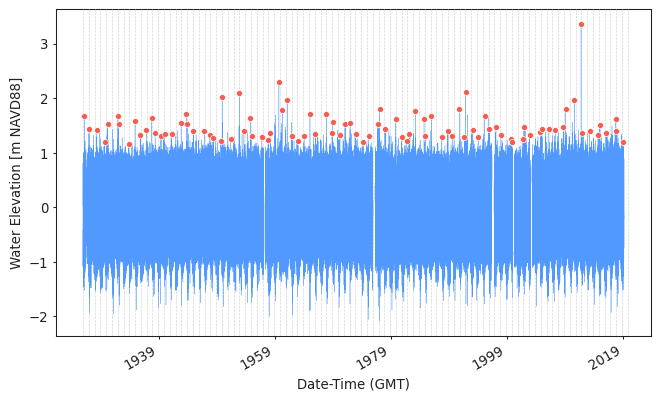

In [9]:
model.plot_extremes()

In [10]:
model.fit_model()

In [11]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)

In [12]:
print(summary)

               return value  lower ci  upper ci
return period                                  
1.0                0.802610 -0.127948  1.024956
2.0                1.409343  1.369695  1.451300
5.0                1.622565  1.549777  1.710459
10.0               1.803499  1.681441  1.955378
25.0               2.090267  1.863276  2.420033
50.0               2.354889  2.009470  2.927499
100.0              2.671313  2.161552  3.649160
250.0              3.188356  2.379739  4.973820
500.0              3.671580  2.559714  6.384690
1000.0             4.252220  2.745496  8.266714


In [13]:
model.plot_diagnostic(alpha=0.95)

AttributeError: 'NoneType' object has no attribute 'canvas'